# 1. Import Necessary Packages and Libraries

In [6]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
%matplotlib inline

# 2. Read in Model Results

In [9]:
fps = list(itertools.chain.from_iterable([[f'{y}{x}' for x in os.listdir(y) if '.pkl' in x] for y in ['ShallowNNTitles/','EmbeddingModelsAbstracts/',
                                                    'HFEmbeddingModelsAbstracts/']]))
display(fps[:5])
display(fps[-5:])

['ShallowNNTitles/Multiagent Systems.pkl',
 'ShallowNNTitles/Image and Video Processing.pkl',
 'ShallowNNTitles/Cryptography and Security.pkl',
 'ShallowNNTitles/Information Retrieval.pkl',
 'ShallowNNTitles/Graphics.pkl']

['HFEmbeddingModelsAbstracts/Human-Computer Interaction.pkl',
 'HFEmbeddingModelsAbstracts/Computation and Language.pkl',
 'HFEmbeddingModelsAbstracts/Distributed, Parallel, and Cluster Computing.pkl',
 'HFEmbeddingModelsAbstracts/Robotics.pkl',
 'HFEmbeddingModelsAbstracts/Signal Processing.pkl']

In [12]:
model_types = list(set([x.split('/')[0] for x in fps]))
display(model_types)

topics = list(set([x.split('/')[1][:-4] for x in fps]))
display(topics)

['ShallowNNTitles', 'HFEmbeddingModelsAbstracts', 'EmbeddingModelsAbstracts']

['Statistics Theory',
 'Multimedia',
 'Information Theory',
 'Computation and Language',
 'Audio and Speech Processing',
 'Signal Processing',
 'Systems and Control',
 'Distributed, Parallel, and Cluster Computing',
 'Neural and Evolutionary Computing',
 'Multiagent Systems',
 'Computer Vision and Pattern Recognition',
 'Optimization and Control',
 'Quantitative Methods',
 'Applications',
 'Cryptography and Security',
 'Social and Information Networks',
 'Computers and Society',
 'Graphics',
 'Information Retrieval',
 'Image and Video Processing',
 'Robotics',
 'Methodology',
 'Human-Computer Interaction',
 'Artificial Intelligence',
 'Machine Learning']

In [18]:
val_results_df = pd.DataFrame(np.zeros((len(topics), len(model_types))), columns = model_types, index = topics)
test_results_df = val_results_df.copy()

In [19]:
for fp in fps:
    mt = fp.split('/')[0]
    topic = fp.split('/')[1][:-4]
    
    results = pickle.load(open(fp,'rb'))
    
    val_results_df.loc[topic,mt] = results['best_val_score']
    test_results_df.loc[topic,mt] = results['best_test_score']

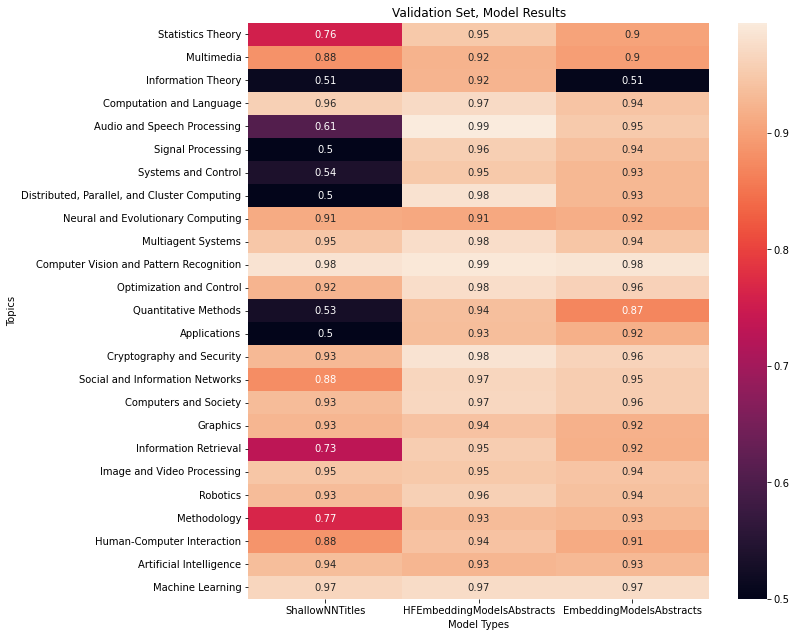

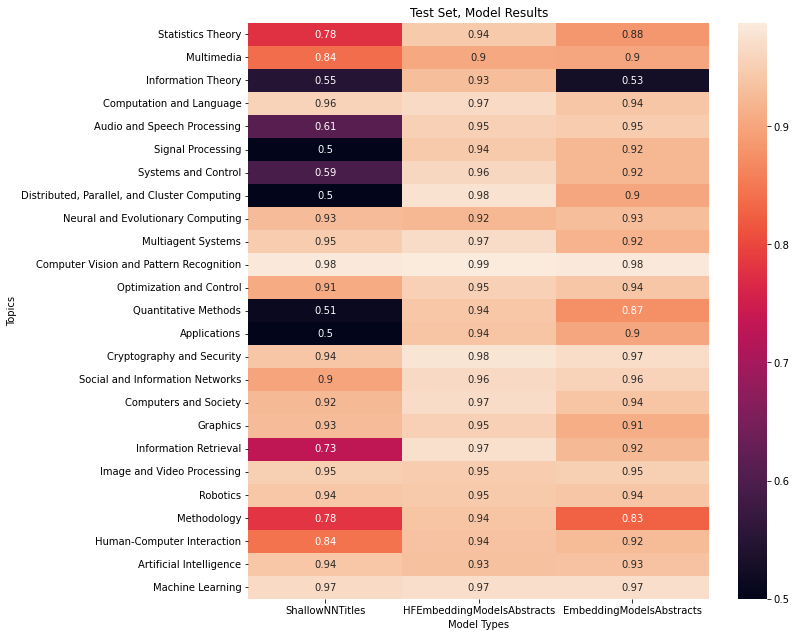

In [28]:
fig = plt.figure(figsize = (8,8))
axes = fig.add_axes([0,0,1,1])
sns.heatmap(val_results_df, annot = True, ax = axes)
axes.set_title('Validation Set, Model Results')
axes.set_ylabel('Topics')
axes.set_xlabel('Model Types')
plt.close()

display(fig)

fig = plt.figure(figsize = (8,8))
axes = fig.add_axes([0,0,1,1])
sns.heatmap(test_results_df, annot = True, ax = axes)
axes.set_title('Test Set, Model Results')
axes.set_ylabel('Topics')
axes.set_xlabel('Model Types')
plt.close()

display(fig)

In [35]:
agg_results = pd.DataFrame(pd.concat([val_results_df.mean(axis = 0),
           val_results_df.std(axis = 0),
                                     test_results_df.mean(axis = 0),
           test_results_df.std(axis = 0)],axis = 1))

agg_results.columns = ['Average Recall (Val)','Score STD (Val)','Average Recall (Test)','Score STD (Test)']

agg_results

,Average Recall (Val),Score STD (Val),Average Recall (Test),Score STD (Test)
ShallowNNTitles,0.795159,0.182944,0.797808,0.177862
HFEmbeddingModelsAbstracts,0.954677,0.023002,0.951547,0.019724
EmbeddingModelsAbstracts,0.916814,0.089312,0.909152,0.086465
